# 3.6.2 Simple Linear Regression

In [4]:
#load required libraries
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('Data/Boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Data consists of 506 neighbourhoods around Boston. There are 13 predictors like age (average age of houses), rm (avg number of rooms per house) and so on as shown in the table above. 

#### Fitting a linear regression model

Fitting a simple linear regression model to the data with **medv** as the response and **lstat** as the predictor where, 

**medv**  - Median value of owner-occupied homes in $1000's 

**lstat** - % lower status of the population (explained in appendix)

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

fit1 = smf.ols('medv~lstat', data=data).fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           5.08e-88
Time:                        20:54:45   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

#### Hypothesis test, t-statistic and p-value

A hypothesis test can be done on the coefficients to check if there exists a relationship between lstat and medv. 

We assume the null hypothesis to be $$H_{0}: \text{There is no relationship between lstat and medv}$$

versus the alternate hypothesis $$H_{a}: \text{There exists some relationship between lstat and medv}$$


If ${\beta_{1}}$ is the true coefficient of lstat when the linear regression model is fitted to the data, then

$$H_{0}: \beta_{1} = 0 $$ versus
$$H_{a}: \beta_{1} != 0 $$

The t-statistic is defined as 
$$ t = (\hat{\beta} -  0) / SE(x) $$
where $\hat{\beta_{1}}, 0$ are the calculated value of the parameter and the value assumed in the null hypothesis respectively. It calculates the number of standard deviations $\hat{\beta}$ is away from 0. 

In this situation, $\hat{\beta_{1}}$ can be the coefficient calculated for lstat in the above table. The null hypothesis is that this value is zero and based on the t-statistic, we calculate the p-value.

#### How do we obtain the corresponding p-value?
The p-value is obtained by looking up its corresponding value according to the value of the t-statistic. We use look up tables for this as the probability of the t-statistic being greater than a particular value ($P(t>= 2.75)$) is obtained by calculating the area under the distribution. Doing this is cumbersome and we can standardize the dataset to obtain a normal curve (with mean zero and standard deviation one) and use this single table to calculate the probabilities for any distribution as the t-distribution has a bell shape and is similar to the normal distribution if it has more than 30 data points. 

Each part of the above results can be accessed using tables as shown below

In [21]:
fit1.summary().tables[0]

Dep. Variable:,medv,R-squared:,0.544
Model:,OLS,Adj. R-squared:,0.543
Method:,Least Squares,F-statistic:,601.6
Date:,"Tue, 23 Mar 2021",Prob (F-statistic):,5.08e-88
Time:,06:19:21,Log-Likelihood:,-1641.5
No. Observations:,506,AIC:,3287.
Df Residuals:,504,BIC:,3295.
Df Model:,1,,
Covariance Type:,nonrobust,,


The coefficient estimates are given in the table so the equation is of the form $$y = mx + c$$ and is 

$$medv = -0.95*lsat + 34.55$$

The p-values and confidence interval is given for both the intercept and the lstat term as shown below.

In [22]:
fit1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,34.5538,0.563,61.415,0.000,33.448,35.659
lstat,-0.9500,0.039,-24.528,0.000,-1.026,-0.874


In [23]:
fit1.summary().tables[2]

Omnibus:,137.043,Durbin-Watson:,0.892
Prob(Omnibus):,0.000,Jarque-Bera (JB):,291.373
Skew:,1.453,Prob(JB):,5.36e-64
Kurtosis:,5.319,Cond. No.,29.7


Plotting the fitted line to the data:

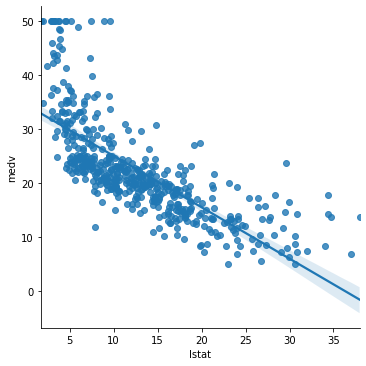

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.lmplot(x="lstat",y="medv",data=data)

#### Diagnostic plots

It can be observed from the above plot that the data has a slightly non-linear relationship. 

Residual plots are used to see the quality of fit of the model. Residual plot consists of the fitted/predicted values vs. the difference between the predicted values and true/actual values. 

Plotting the residuals to check if there is any pattern:

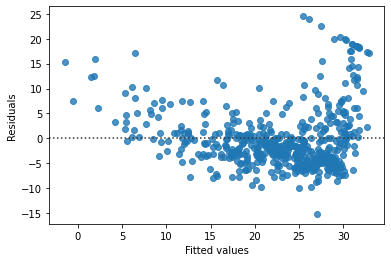

In [8]:
import matplotlib.pyplot as plt

y_pred = fit1.predict(data)
residuals = data['medv'] - y_pred
sns.residplot(x=y_pred, y=residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

The residuals are not distributed evenly around a horizontal line drawn through the center of the plot. This indicates the difference between the prediction and actual values increases - the data does not have a linear relationship.

Outliers can also be filtered out to improve the fit of the line. In practice, it is difficult to choose a threshold value for which a point should be considered an outlier. In this case we use studentized residuals which is calculated by dividing a residual by its estimated standard error. 

The values greater than |3| are considered possible outliers.  

Plotting the studentized residuals:

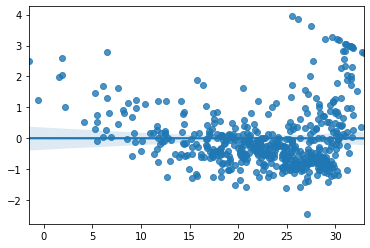

In [9]:
from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(fit1)
standardized_residuals = influence.resid_studentized_internal

ax = sns.regplot(x=y_pred, y=standardized_residuals)
plt.show()

# 3.6.3 Multiple Linear Regression

#### Multiple linear regression with two predictor variables
In multiple linear regression, more than one predictor variable is used to create a model that fits the data. I used two predictors, lstat and age to create a model below. 

In [10]:
fit2 = smf.ols('medv~lstat+age', data=data).fit()
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           2.98e-88
Time:                        20:54:54   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

There is no improvement in this model compared to the model that used only lstat as a predictor. This is also evident from the p-value of **age**, which indicates it does not have a significant influence on the output/response **medv** (I do not plot the fitted line to the data as I use multiple predictor variables and this is hard to visualize in a 2-d space)

#### F-statistic
When we use multiple predictor variables, we use the F-statistic instead of the t-statistic to compute the p-values as our null hypothesis changes. 

We assume the null hypothesis to be 

$$\text{H_{0}: There is no relationship between lstat and medv or between age and medv}$$

versus the alternate hypothesis 

$$\text{H_{a}: There exists some relationship between lstat and medv and also a relationship between age and medv}$$


If ${\beta_{1}}$ is the true coefficient of lstat and ${\beta_{2}}$ is the true coefficient of age when the linear regression model is fitted to the data, then

$$H_{0}: \beta_{1} = \beta_{2} = 0 $$ versus
$$H_{a}: \text{at least one $\beta_{j}$ is non-zero} $$

The F-statistic is defined as 
$$ t = \frac{(TSS - RSS)/p)}{RSS/(n-p-1)} $$

where $p$ = number of predictor values, $n$ = number of datapoints,  $TSS = \sum(y_{i} - \hat{y})^2$ and $RSS = (y_{i} - \hat{y_{i}})^2$. 

Hence if there is no value between the output/response and predictor variables, the F-statistic will have a value close to 1. If $H_{a}$ is true, the value will be greater than 1 which it is in this case. The value of the F-statistic needed to reject $H_{0}$ can be computed by statistical software. When $n$ is large, an F-statistic that is slightly larger than 1 is sufficient. 


#### Why do we use F-statistic if we already have the individual p values and can use this to determine the significant variables?

Consider a case where $p$ = 100 and $H_{0}: \beta_{1} = \beta_{2} = ... = \beta_{j}$ = 0. No predictor variable is associated with the response but there is still a chance for one of the p-values to be below 0.05, leading us to incorrectly conclude there is a relationship between one of the predictors and the response if we use the t-statistic as it is given be $ t = (\hat{\beta} -  0) / SE(x) $ and does not take the number of variables into account. 

But the F-statistic also adjusts for the number of predictors so we can use the F-statistic to confidently accept/reject the null hypothesis. (This example is taken from the book, Introduction to Statistical Learning).

#### Multiple Linear Regression with all predictor variables

Fitting a multiple linear regression model with all the predictors: 
(String manipulation is used as it is cumbersome to type out the names of all the columns)

In [11]:
columns = "+".join(data.columns.difference(['medv']))
formula = "medv~" + columns
fit2 = smf.ols(formula=formula, data=data).fit()
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          6.72e-135
Time:                        20:55:00   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

It is observed that the R-squared value increases when using all the predictor variables. 

The standard error for each of the predictor values is given by

In [31]:
fit2.bse

Intercept    5.103459
age          0.013210
black        0.002686
chas         0.861580
crim         0.032865
dis          0.199455
indus        0.061496
lstat        0.050715
nox          3.819744
ptratio      0.130827
rad          0.066346
rm           0.417925
tax          0.003761
zn           0.013727
dtype: float64

I noticed the p-values of age and indus predictor variables are large, hence I fitted a new line without them. There is a large improvement in the R-squared statistic, indicating this model fits the data better. I also tried using only the most significant variables but there is no significant difference in the result between using this vs. using all predictor variables. 

In [12]:
columns = "+".join(data.columns.difference(['medv', 'age', 'indus']))
formula = "medv~" + columns
fit3 = smf.ols(formula=formula, data=data).fit()
print(fit3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          5.54e-137
Time:                        20:55:03   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

# 3.6.4 Interaction terms

Linear regression makes an additive assumption, i.e the effect of a predictor variable $X_{j}$
on the output $y$ is independent of other predictor variables. This is not always true. 

Interaction terms take into account the effect of multiple variables. For example if I take  

$$y = \beta_{0} + \beta_{1}*x_{1} + \beta_{2}*x_{2}$$  
and 
$$y = \beta_{0} + \beta_{1}*x_{1} + \beta_{2}*x_{2}  + \beta_3*x_1*x_{2}$$
$$y = \beta_{0} + (\beta_{1} + \beta_{2}*x_2)*x_{1} + + \beta_{2}*x_{2}$$


Now, in the second set of equations if $x_{2}$ changes, the effect of $x_{1}$ on y also changes. 
Here, using the * operator includes the individual terms that make up the interaction term so the equation is 
$$medv = lstat + rm + lstat*rm$$.

In [13]:
fit4 = smf.ols('medv~lstat*rm + lstat*chas + chas*rm', data=data).fit()
print(fit4.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     258.7
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          1.19e-149
Time:                        20:55:08   Log-Likelihood:                -1482.6
No. Observations:                 506   AIC:                             2979.
Df Residuals:                     499   BIC:                             3009.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -31.8108      3.421     -9.300      0.0

It is observed using the interaction terms improves the results (specifically the R-squared statistic from 0.741 with all variables to 0.757 with only 3 predictor variables and their interaction terms). This indicates the additive assumption cannot be made here. 

# 3.6.5 Non-linear transformations of predictors

Linear regression also assumes there is a straight line relationship between the predictors and their response. From the results of simple linear regression and the plot of the data (medv vs. lstat), it appears the data is non-linearly distributed. 

The linear regression function also accomodates non-linear transformations of the predictor variables. So we can use a non-linear transformation of lstat and check if this model fits the data better. 

The function I() is required to make sure the formula uses lsat^2 as intended (Trying the formula lstat + lstat^2 gave me the same results as simple linear regression)

Fitting the data using nonlinear transformations of predictors:

In [14]:
f = 'medv ~ lstat + I(lstat**2)'
fit5 = smf.ols(f, data=data).fit()
print(fit5.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          1.56e-112
Time:                        20:55:12   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

In [15]:
f = 'medv ~ lstat + I(lstat**2) + lstat*rm + chas + black + np.log(rm)'
fit6 = smf.ols(f, data=data).fit()
print(fit6.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     238.9
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          1.05e-154
Time:                        20:55:16   Log-Likelihood:                -1467.8
No. Observations:                 506   AIC:                             2952.
Df Residuals:                     498   BIC:                             2986.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        97.2071     19.881      4.889

#### ANOVA

Using ANOVA (Analysis of variance) table to see if the linear or quadratic fit is better. Here the null hypothesis is that both models fit that data equally well, the alternative hypothesis is that the quadratic model is superior. 

By looking at the sum of squares, the quadratic model is better (The RSS has reduced, the F statistic is 135 and the p-value is extremely small)

In [18]:
table = sm.stats.anova_lm(fit1, fit2)
table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,492.0,11078.784578,12.0,8393.59684,31.062746,6.824831e-53


The quadratic model seems to be a better fit with the high F-squared statistic as well as a low p-value. 

# 3.6.6 Qualitiative predictors

In [17]:
path = 'Data/Carseats.csv'
carseats = pd.read_csv('Data/Carseats.csv')
carseats = carseats.drop(columns = ['Unnamed: 0'])
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


Here, qualitative predictors like ShelveLoc, Urban and US are also used by the model. Dummy variables are created within Python to deal with these kind of values. The value taken to represent Good, Bad and Medium in ShelveLoc will change the coefficients for that predictors but the final predictions will be the same. 

Sales is predicted using the predictor variables in the above table. 
$Income:Advertising$ includes an interaction term that consists of $Income * Advertising$

In [20]:
columns = "+".join(carseats.columns.difference(['Sales']))
f = 'Sales ~ Income:Advertising+Price:Age+' + columns
fit = smf.ols(f, data=carseats).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          6.14e-166
Time:                        06:14:05   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756    

##### Appendix:

1. From dataset documentation in Table IV of Harrison & Rubin (1978), LSTAT is defined as:
    Proportion of population that is lower status = 1/2 (proportion of adults without, some high school education and proportion of male workers classified as laborers). The logarithmic specification implies that socioeconomic status distinctions mean more in the upper brackets of society than in the lower classes. Source: 1970 U. S. Census
    Harrison Jr, David, and Daniel L. Rubinfeld. "Hedonic housing prices and the demand for clean air." Journal of environmental economics and management 5, no. 1 (1978): 81-102.